In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Dataset/Palladium.csv")

In [3]:
df.head()

,Date,Open,Close,High,Low
0,2018-01-01,1067.5,1067.5,1067.5,1067.5
1,2018-01-02,1066.5,1096.0,1099.0,1066.0
2,2018-01-03,1095.5,1088.0,1097.0,1084.0
3,2018-01-04,1086.5,1102.5,1108.5,1083.5
4,2018-01-05,1100.0,1091.5,1103.0,1086.5


In [4]:
df = df[["Close"]]
df.reset_index(drop=True)
df.isnull().sum()

Close    0
dtype: int64

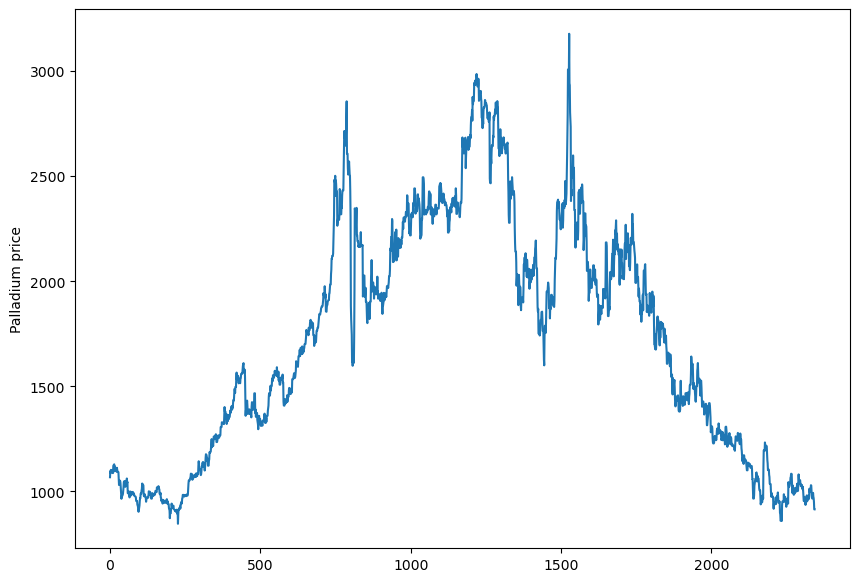

In [5]:
df.Close.plot(figsize = (10, 7))
plt.ylabel("Palladium price")
plt.show()


In [6]:
t = .8
t = int(t * len(df))

data_train = df[:t]
data_test = df[t:]

In [7]:
# Chia các tập x,y train, test tương ứng
X_train = np.array(data_train.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(data_train['Close']) #Lấy dữ liệu giá Close

X_test = np.array(data_test.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(data_test['Close']) #Lấy dữ liệu giá Close

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#Tạo mô hình hồi quy tuyến tính y = m*X1 + c
linear = LinearRegression().fit(X_train, y_train)
print("m1: " , linear.coef_[0])
print("c: " , linear.intercept_)

m1:  0.7095819433098266
c:  1187.1497191186925


In [10]:
predicted_price = linear.predict(X_test)
predicted = pd.DataFrame(predicted_price, columns = ['Close'])
predicted

,Close
0,2517.615863
1,2518.325445
2,2519.035027
3,2519.744609
4,2520.454191
...,...
464,2846.861885
465,2847.571466
466,2848.281048
467,2848.990630


In [11]:
mape = np.mean(np.abs(predicted_price - y_test)/np.abs(y_test)) *100
mse = np.mean(np.square(y_test - predicted_price))
rmse = np.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 132.93494903301055
Mean Squared Error (MSE): 2314930.0543399425
Root Mean Squared Error (RMSE): 1521.4894197265858


In [12]:
dt_train = np.append(data_train, predicted['Close'][0]) 

In [13]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = linear.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[2850.40979424 2851.11937618 2851.82895812 2852.53854007 2853.24812201
 2853.95770395 2854.6672859  2855.37686784 2856.08644978 2856.79603173
 2857.50561367 2858.21519561 2858.92477756 2859.6343595  2860.34394144
 2861.05352339 2861.76310533 2862.47268727 2863.18226922 2863.89185116
 2864.6014331  2865.31101505 2866.02059699 2866.73017893 2867.43976088
 2868.14934282 2868.85892476 2869.56850671 2870.27808865 2870.98767059
 2871.69725254 2872.40683448 2873.11641642 2873.82599837 2874.53558031
 2875.24516225 2875.9547442  2876.66432614 2877.37390808 2878.08349003
 2878.79307197 2879.50265391 2880.21223586 2880.9218178  2881.63139974
 2882.34098169 2883.05056363 2883.76014557 2884.46972752 2885.17930946
 2885.8888914  2886.59847335 2887.30805529 2888.01763723 2888.72721918
 2889.43680112 2890.14638306 2890.85596501 2891.56554695 2892.27512889
 2892.98471084 2893.69429278 2894.40387472 2895.11345667 2895.82303861
 2896.53262055 2897.2422025  2

In [14]:
plt.rcParams['figure.figsize'] = [18, 10]

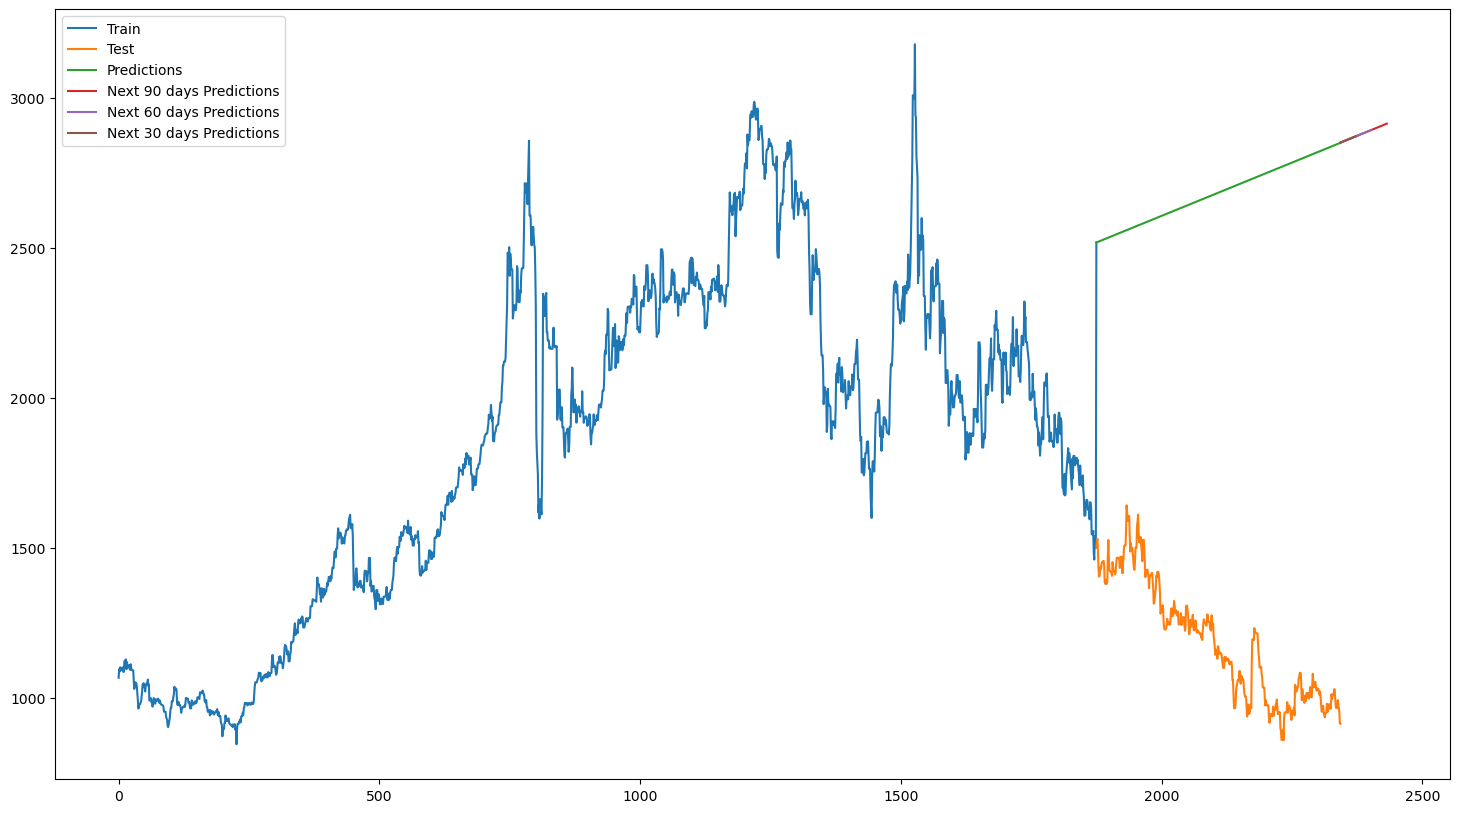

In [15]:
plt.plot(pd.RangeIndex(start=0, stop=len(dt_train), step=1), dt_train)
plt.plot(data_test.index, data_test['Close'])
plt.plot(data_test.index, predicted['Close'])
plt.plot(last_data,y_next_90_days)
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+60, step=1),y_next_90_days[0:60])
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+30, step=1),y_next_90_days[0:30])
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])
plt.show()